<a href="https://colab.research.google.com/github/Dongjin-1203/codeit_mission/blob/main/%EB%AF%B8%EC%85%982_2%ED%8C%80_%EC%A7%80%EB%8F%99%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 스프린트 미션2
----
## __목표__: 예약이 어떤이유로 취소가 되고 이를 줄일 방안을 고민해보자.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 로드

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/codeit/hotel_data_modified.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 1. target data: is_canceled 비율 확인

In [ ]:
df['is_canceled'].value_counts(normalize=True)  # 비율 확인

,proportion
is_canceled,
0,0.629584
1,0.370416


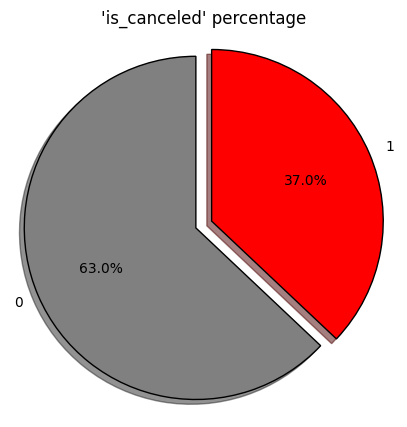

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

counter = Counter(df['is_canceled'])
labels = ['0', '1']
sizes = [counter[0], counter[1]]

# 색상
colors = ['grey', 'red']

# explode 설정 (조각을 중심에서 얼마나 떨어뜨릴지)
explode = [0.05, 0.05]

# 파이차트 그리기
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        explode= explode, shadow=True,
        colors= colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title("'is_canceled' percentage")
plt.axis('equal')  # 동그란 원이 되도록 설정
plt.show()

__예약 취소와 아닌경우의 비율은 각각 63%, 37%로 확인되었다.__

## 피어슨 상관계수 확인

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 데이터프레임 복사
df_encoded = df.copy()

# object 타입의 컬럼만 추출
categorical_cols = df.select_dtypes(include='object').columns

# 각 컬럼에 LabelEncoder 적용
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # 결측치 처리를 위해 문자열로 형변환
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # 나중에 역변환을 위해 저장


In [ ]:
# 예: 모든 결측치를 0으로 채우기
df_encoded.fillna(0, inplace=True)

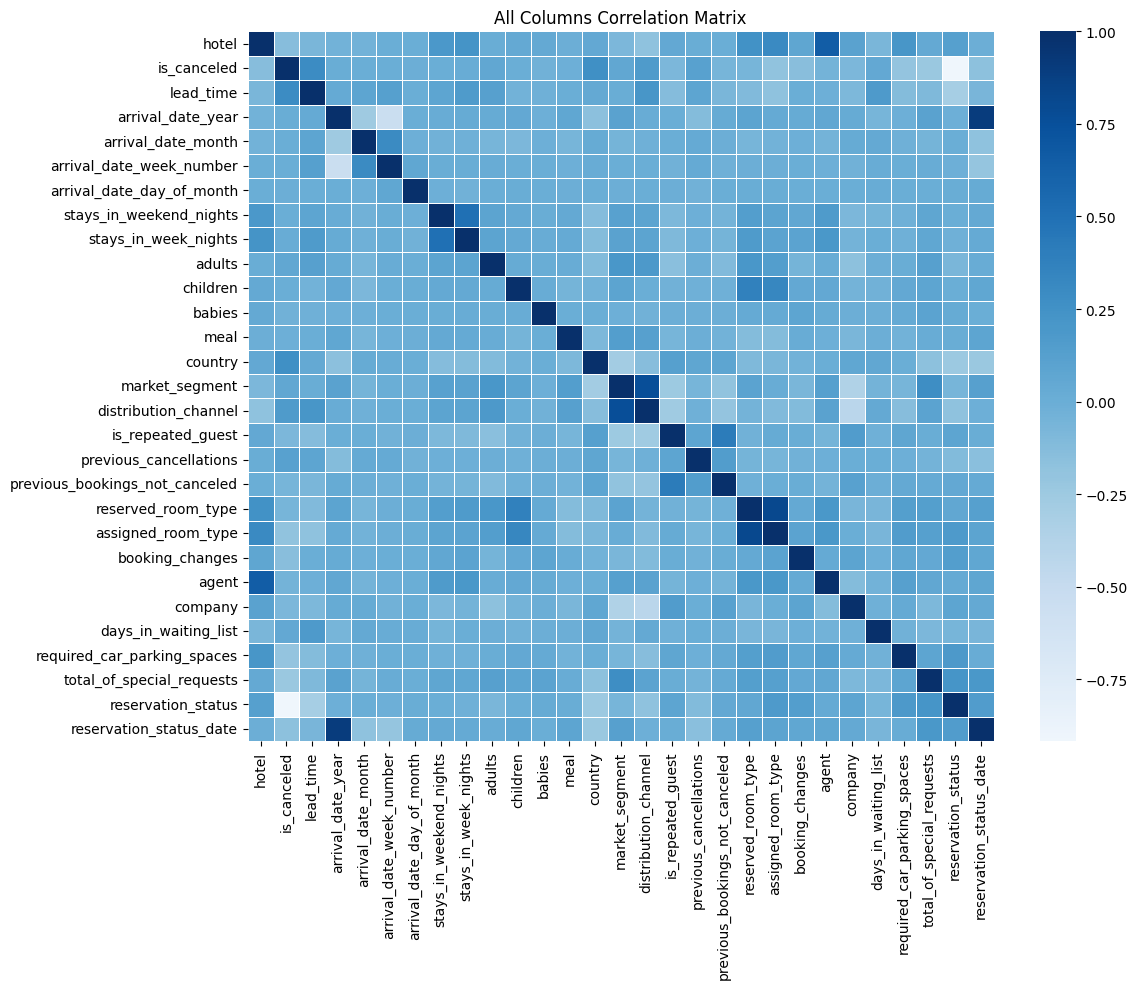

In [ ]:
import seaborn as sns
# 2) 상관행렬 계산
corr_matrix = df_encoded.corr()

# 3) 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            cmap='Blues',
            center=0,
            linewidths=0.5)       # 셀 경계선
plt.title('All Columns Correlation Matrix')
plt.tight_layout()
plt.show()

'country', 'lead_time' 두경우가 가장 상관계수가 높았다.

## 2. 사람관련 데이터 분석

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('is_canceled')   # 수치형 변수들

In [ ]:
num_cols

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
df['children'].isna().sum()

np.int64(4)

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df['children'].value_counts(dropna=False)

,count
children,
0.0,110796
1.0,4861
2.0,3652
3.0,76
NaN,4
10.0,1


In [ ]:
df['children'].fillna(0, inplace=True)

/tmp/ipython-input-14-289084130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)


In [ ]:
df['children'].astype(int)

,children
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [ ]:
df['total_member'] = df['adults'] + df['babies'] + df['children']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_member
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03,2.0


In [ ]:
people = ['adults', 'babies', 'children', 'total_member', 'is_canceled']
df_poeple = df[people]
df_poeple.head()

,adults,babies,children,total_member,is_canceled
0,2,0,0.0,2.0,0
1,2,0,0.0,2.0,0
2,1,0,0.0,1.0,0
3,1,0,0.0,1.0,0
4,2,0,0.0,2.0,0


In [ ]:
df_poeple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   adults        119390 non-null  int64  
 1   babies        119390 non-null  int64  
 2   children      119390 non-null  float64
 3   total_member  119390 non-null  float64
 4   is_canceled   119390 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.6 MB


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

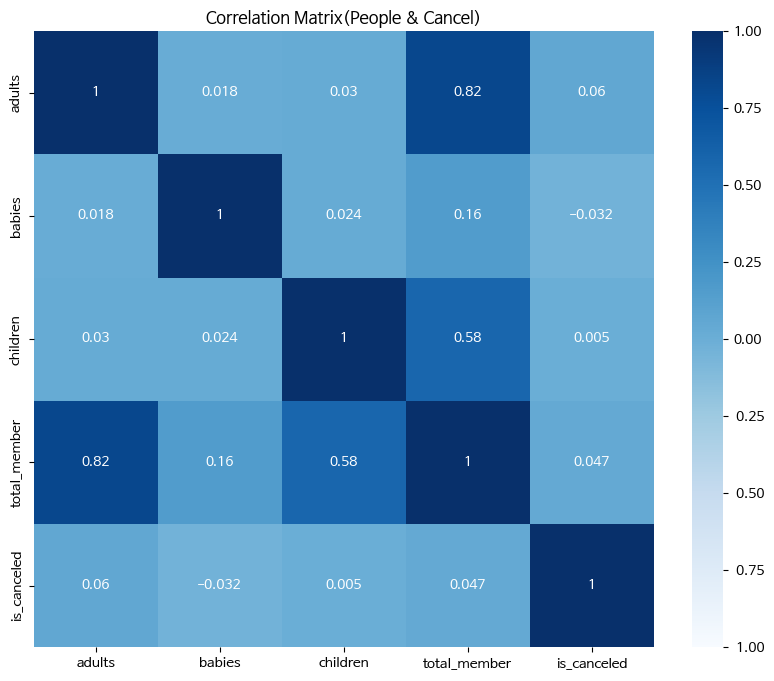

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_poeple.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title("Correlation Matrix(People & Cancel)")
plt.show()

1. 아이들은 혼자 오기가 힘들기때문에 높은확률로 어른이 온다.
2. 아기가 상관관계가 낮은 이유는 데리고 다니기 힘들어서 일 것이다

아이(어린이, 신생아)를 동반한 고객의 취소 선택 추세를 볼예정

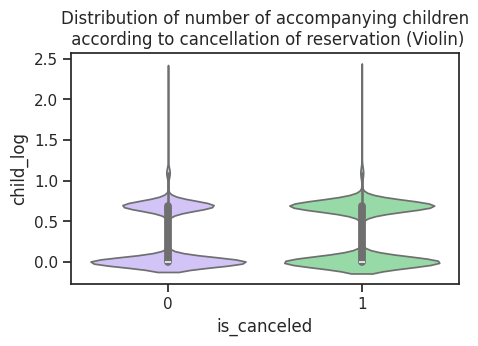

In [ ]:
import numpy as np
sns.set_theme(style="ticks", palette="pastel")

# 아이 데이터 생성
df_poeple['child'] = df_poeple['children'] + df_poeple['babies']

# 로그변환(가시성을 위해)
df_poeple['child_log'] = np.log(df_poeple['child'])

# 시각화
plt.figure(figsize=(5,3))
sns.violinplot(x='is_canceled', y='child_log', palette=["m", "g"], data=df_poeple)
#sns.despine(offset=10, trim=True)
plt.title('Distribution of number of accompanying children\n according to cancellation of reservation (Violin)')
plt.show()

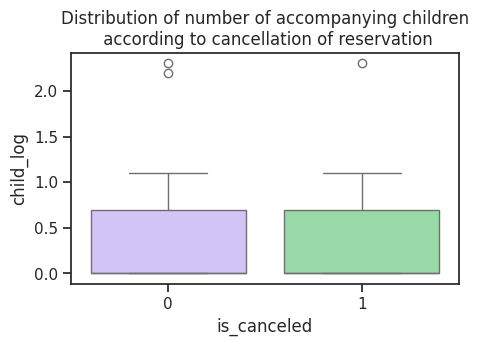

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x='is_canceled', y='child_log', palette=["m", "g"], data=df_poeple)
plt.title('Distribution of number of accompanying children\n according to cancellation of reservation')
plt.show()

1. 아이가 있다고해서 예약 취소 수가 늘어나는 것은 식별되지 않음.
2. 되려 아이가 많음에도 불구하고 예약을 취소하지 않고 투숙하는경우도 존재

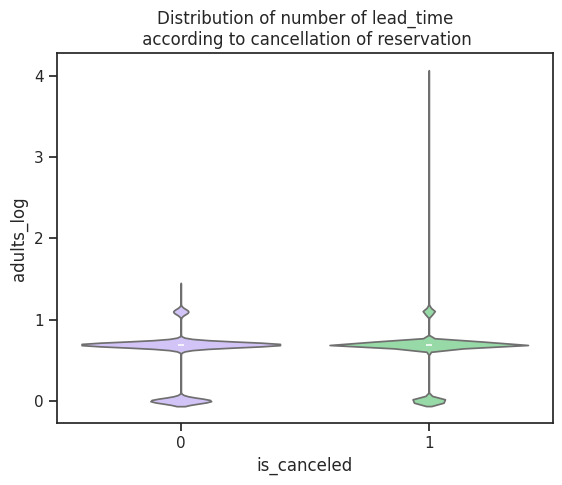

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# 로그변환(가시성을 위해)
df_poeple['adults_log'] = np.log(df_poeple['adults'])

# lead_time vs is_canceled
sns.violinplot(x='is_canceled', y='adults_log',  palette=["m", "g"], data=df_poeple)
plt.title("Distribution of number of lead_time\n according to cancellation of reservation")
plt.show()

1. 어른의 경우에도 차이는 단체예약의 경우 취소를 한 경우가 발생하였다.
2. 이로서 사람의 구성원에 따른 예약 취소의 차이는 없는 것으로 확인했다.

## 3. 방문, 예약 관련한 데이터 분석

In [ ]:
book_info = ['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'is_canceled']
df_book = df[book_info]
df_book.head()

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,is_canceled
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [ ]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   is_repeated_guest               119390 non-null  int64
 1   previous_cancellations          119390 non-null  int64
 2   previous_bookings_not_canceled  119390 non-null  int64
 3   days_in_waiting_list            119390 non-null  int64
 4   is_canceled                     119390 non-null  int64
dtypes: int64(5)
memory usage: 4.6 MB


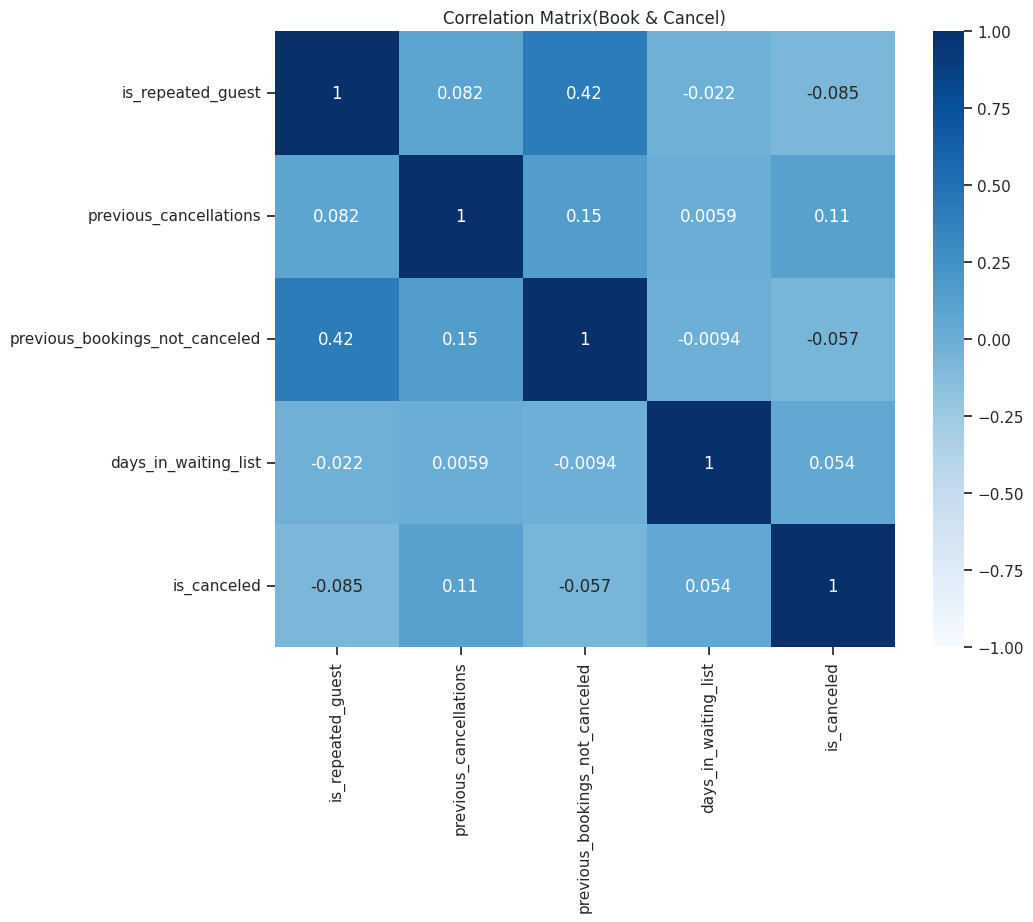

In [ ]:
# 상관계수 계산
corr = df_book.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title("Correlation Matrix(Book & Cancel)")
plt.show()

1. 데이터 간의 상관관계는 없는 것으로 봐도 무방 한 것 같다.
2. 각 데이터와 target의 관계에 집중해보자.
3. 한번도 예약 취소를 안해본 사람과 기방문자 간의 약한 상관관계가 있다.

### 2번 이상 방문한 사람과 한번도 예약 취소를 안해본 사람의 상관관계를 알아보자.

In [ ]:
df_book['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [ ]:
df_book['is_repeated_guest'].unique()

array([0, 1])

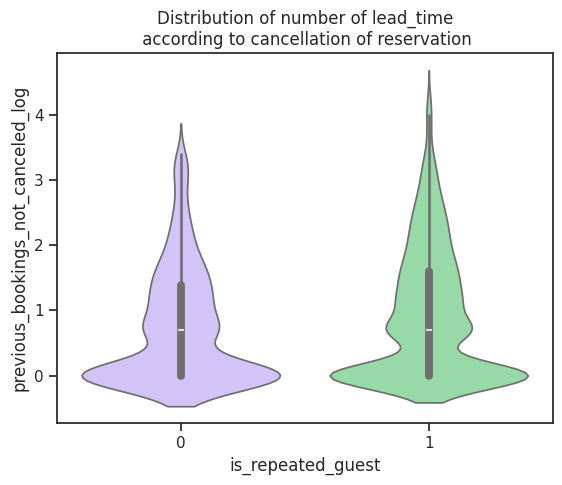

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

# 로그변환(가시성을 위해)
df_book['previous_bookings_not_canceled_log'] = np.log(df_book['previous_bookings_not_canceled'])

# lead_time vs is_canceled
sns.violinplot(x='is_repeated_guest', y='previous_bookings_not_canceled_log',  palette=["m", "g"], data=df_book)
plt.title("Distribution of number of lead_time\n according to cancellation of reservation")
plt.show()

1. 미미하지만 재방문 한 고객들이 예약 취소를 하는 경우가 덜했다.
2. 자주 방문하는 지역이라면 익숙해서 다음과 같은 결과가 나왔다고 판단 할 수 있다.

## 호텔 제공 서비스 관련 데이터 분석

In [ ]:
service = ['required_car_parking_spaces', 'total_of_special_requests', 'meal', 'reserved_room_type', 'assigned_room_type', 'is_canceled']
df_service = df[service]
df_service.head()

,required_car_parking_spaces,total_of_special_requests,meal,reserved_room_type,assigned_room_type,is_canceled
0,0,0,BB,C,C,0
1,0,0,BB,C,C,0
2,0,0,BB,A,C,0
3,0,0,BB,A,A,0
4,0,1,BB,A,A,0


In [ ]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   required_car_parking_spaces  119390 non-null  int64 
 1   total_of_special_requests    119390 non-null  int64 
 2   meal                         119390 non-null  object
 3   reserved_room_type           119390 non-null  object
 4   assigned_room_type           119390 non-null  object
 5   is_canceled                  119390 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.5+ MB


3개의 수치형, 3개의 범주형으로 구성되어있다.

In [ ]:
df_service['required_car_parking_spaces'].unique()  # 주차 자리 희망

array([0, 1, 2, 8, 3])

In [ ]:
df_service['total_of_special_requests'].unique()    # 특별 요청 건수

array([0, 1, 3, 2, 4, 5])

In [ ]:
df_service['is_canceled'].unique()  # 취소

array([0, 1])

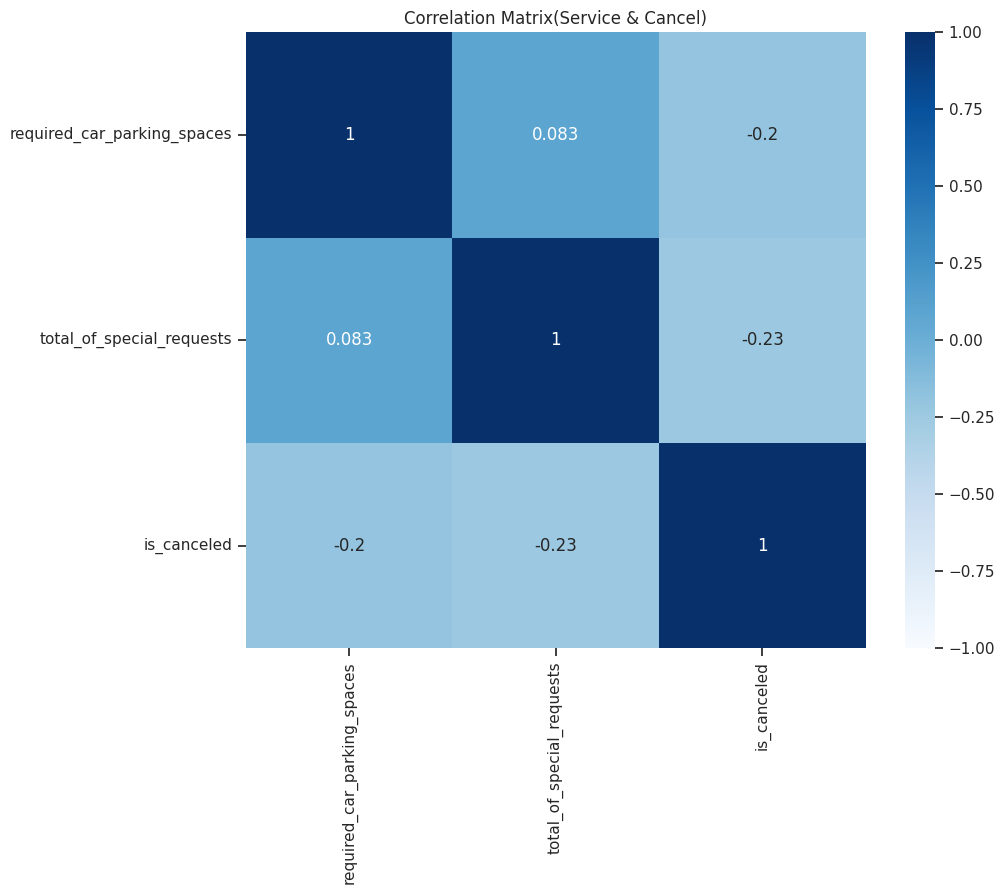

In [ ]:
# 상관계수
ints = ['required_car_parking_spaces', 'total_of_special_requests','is_canceled']
df_service_int = df_service[ints]

corr = df_service_int.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title("Correlation Matrix(Service & Cancel)")
plt.show()

1. 취소와 서비스 관련해서 약한 음의 상관관계가 있다.
2. 오히려 취소하는 사람들은 요구사항이 많이 없는 것 같다.

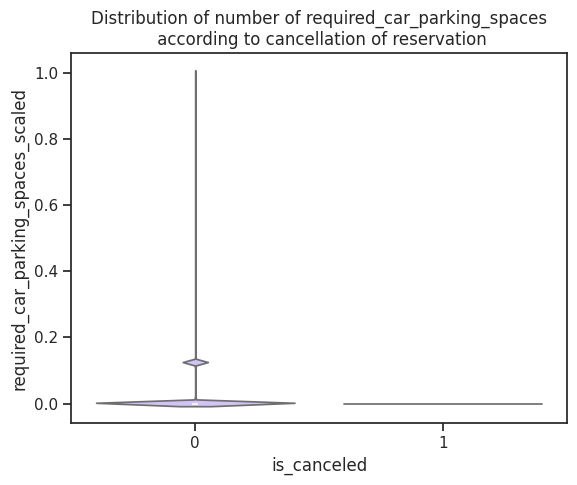

In [ ]:
df_service_int['required_car_parking_spaces_scaled'] = (df_service_int['required_car_parking_spaces'] - df_service_int['required_car_parking_spaces'].min()) / (df_service_int['required_car_parking_spaces'].max() - df_service_int['required_car_parking_spaces'].min())

sns.set_theme(style="ticks", palette="pastel")

# 로그변환(가시성을 위해)
#df_service_int['required_car_parking_spaces_log'] = np.log(df_service_int['required_car_parking_spaces'])

# lead_time vs is_canceled
sns.violinplot(x='is_canceled', y='required_car_parking_spaces_scaled',  palette=["m", "g"], data=df_service_int)
plt.title("Distribution of number of required_car_parking_spaces\n according to cancellation of reservation")
plt.show()

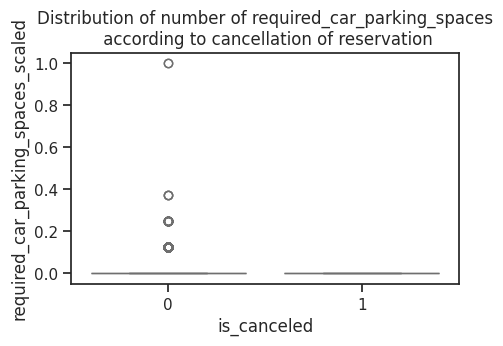

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x='is_canceled', y='required_car_parking_spaces_scaled', palette=["m", "g"], data=df_service_int)
plt.title('Distribution of number of required_car_parking_spaces\n according to cancellation of reservation')
plt.show()

정규화를 해보았지만 시각화에 다소 제한적임으로 데이터를 따로 뽑아 보겠음

In [ ]:
df_service_int['required_car_parking_spaces'][(df_service_int['is_canceled'] == 0)].value_counts()

,count
required_car_parking_spaces,
0,67750
1,7383
2,28
3,3
8,2


In [ ]:
df_service_int['required_car_parking_spaces'][(df_service_int['is_canceled'] == 1)].value_counts()

,count
required_car_parking_spaces,
0,44224


1. 예약 취소를 하지 않은 고객은 주차자리를 요구를 한 경우, 안한 경우 다양하게 분포 되어있었고 대부분은 차를 갖고 오지않았거나 1대만 가지고 온다.
2. 예약 취소를 한 경우는 전부 주차공간을 요구하지 않았다.
3. 기존에 요청을 했다가 취소를 했을 수 있고 에초에 대중교통을 이용해 방문했을 수 있다.

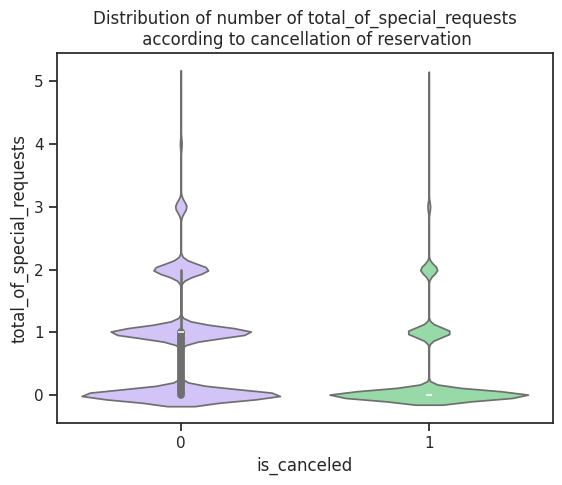

In [ ]:
# MinMaxScaler
#df_service_int['total_of_special_requests_scaled'] = (df_service_int['total_of_special_requests'] - df_service_int['total_of_special_requests'].min()) / (df_service_int['total_of_special_requests'].max() - df_service_int['total_of_special_requests'].min())

sns.set_theme(style="ticks", palette="pastel")

# 로그변환(가시성을 위해)
#df_service_int['total_of_special_requests_log'] = np.log(df_service_int['total_of_special_requests'])

# lead_time vs is_canceled
sns.violinplot(x='is_canceled', y='total_of_special_requests',  palette=["m", "g"], data=df_service_int)
plt.title("Distribution of number of total_of_special_requests\n according to cancellation of reservation")
plt.show()

1. 예약 취소를 하지 않은 경우가 요구사항이 조금 더 많아보인디ㅏ.
2. 두 경우 모두 요구사항이 없는 경우가 대부분이고 있더라도 1,2가지 정도 인것 같다.
3. 그래프를 보았을 때 어떤 경우가 더 많은지 판단이 안되므로 데이터 갯수를 확인해보자.

In [ ]:
df_service_int['total_of_special_requests'].value_counts()

,count
total_of_special_requests,
0,70318
1,33226
2,12969
3,2497
4,340
5,40


In [ ]:
df_service_int['total_of_special_requests'][(df_service_int['is_canceled'] == 0)].value_counts()

,count
total_of_special_requests,
0,36762
1,25908
2,10103
3,2051
4,304
5,38


In [ ]:
df_service_int['total_of_special_requests'][(df_service_int['is_canceled'] == 1)].value_counts()

,count
total_of_special_requests,
0,33556
1,7318
2,2866
3,446
4,36
5,2


요구사항이 많은 사람일수록 예약취소를 하는 경우는 있긴 하나 예약취소의 요인이 되는 것 같지 않다.

되려 숙박하고자 하는 사람일수록 조금 더 요구하는 경향이 있다.

다음은 식사관련이다. 식사를 하는그룹과 안하는 그룹간의 예약 취소의 연관성이 있을까?

In [ ]:
df_service['meal']

,meal
0,BB
1,BB
2,BB
3,BB
4,BB
...,...
119385,BB
119386,BB
119387,BB
119388,BB


In [ ]:
df_service['meal'].value_counts()

,count
meal,
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798


약 11000건 정도는 밥을 안먹고 나머지 10만건은 식사를 한다.

이것을 식사를 하면 1, 안하면 0으로 바꿔주자

In [ ]:
df_service['is_meal'] = df_service['meal'].apply(lambda x: 0 if x in ['Undefined', 'SC'] else 1)

In [ ]:
df_service['is_meal'].value_counts()

,count
is_meal,
1,107571
0,11819


정수형으로 반환이 완료 되었다.

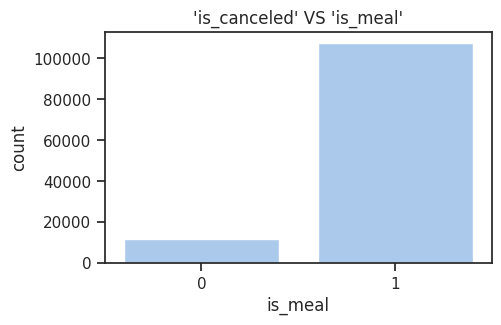

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='is_meal', data=df_service)
plt.title("'is_canceled' VS 'is_meal'")
plt.show()

일단 투숙객 대부분은 식사를한다.

식사여부와 취소여부의 관계를 파악하기 위해 __카이제곱 검정__을 생행해야한다.


### 카이제곱 검정
 범주형 데이터의 분포 차이를 검정하는 통계적 방법

카이제곱 검정으로 무엇을 하는가

1. __적합도 검사__:

 관잘된 비율값이 기대값과 같은 지 검정하는 방법으로 어떤 모집단의 표본을 추출하여 조사할 때 그 모집단을 대표하는지 검정하는 방법이다.

2. __동질성 검정__:

 두 집단의 분포가 동일한지 검정

3. __독립성 검정__:

 Contingency table(분할표: 두 변수의 관계를 나타낸 표)에 있는 두 변수가 서로 독립인지를 검정하느 ㄴ것이다. 기대빈도는 두 변수가 서로 상관이 없고, 독립적이라고 기대하게 되고, 관찰빈도와의 차이를 통해서 기대빈도와의 진위여부를 밝히는 방법이다.

In [ ]:
# 분할표(crosstab) 만들기
ad_cross = pd.crosstab(df_service['is_canceled'], df_service['is_meal'])
ad_cross

is_meal,0,1
is_canceled,,
0,7567,67599
1,4252,39972


In [ ]:
from scipy.stats import chi2_contingency

# 카이제곱 독립성 검정
_, p, _, _ = chi2_contingency(ad_cross)

# 결과 출력
if p < 0.05:
    print(f"p-value = {p:.4f} → 유의미한 관계 있음 (귀무가설 기각)")
else:
    print(f"p-value = {p:.4f} → 유의미한 관계 없음 (귀무가설 채택)")

p-value = 0.0118 → 유의미한 관계 있음 (귀무가설 기각)


__귀무가설__: 'is_canceled'과 'is_meal'는 독립이다.
__대립가설__: 'is_canceled'과 'is_meal'는 독립이 아니다.


_p-value_ 가 0.05 이하이면 대립가설이 채택이 된다 즉 두 변수는 서로 영향을 주고 있다.

'reserved_room_type', 'assigned_room_type'도 분석해보자

In [ ]:
df_service['reserved_room_type'].value_counts()

,count
reserved_room_type,
A,85994
D,19201
E,6535
F,2897
G,2094
B,1118
C,932
H,601
P,12


10개의 방 타입이 있었다. A등급이 가장 기본적인 방 타입으로 추정된다.

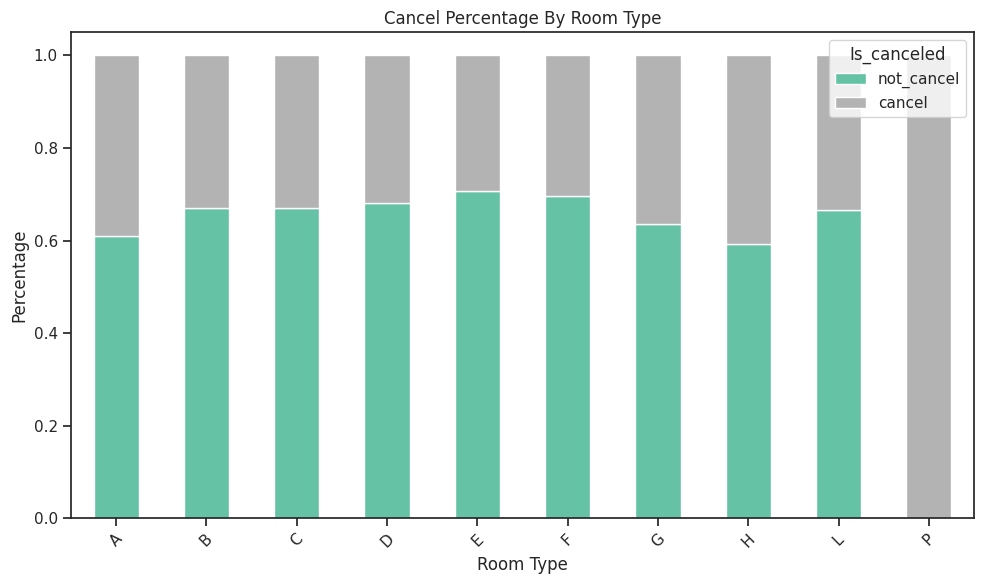

In [ ]:
ct = pd.crosstab(df_service['reserved_room_type'], df_service['is_canceled'], normalize='index')

ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Cancel Percentage By Room Type')
plt.xlabel('Room Type')
plt.ylabel('Percentage')
plt.legend(['not_cancel', 'cancel'], title='Is_canceled')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

대부분 룸타입에서 예약 취소 건이 발생하고 있고 이것은 60%를 웃돌고 있다.

모종의 이유가 있는 것 같은데 'assigned_room_type'데이터를 한 번 살펴보자.

예약한 방과 실제 배정된 방이 다를 경우 예약 취소에 영향을 줄 수 있을 것 같다.

In [ ]:
df_service['reserved_room_type'].values

array(['C', 'C', 'A', ..., 'D', 'A', 'A'], dtype=object)

In [ ]:
df_service['assigned_room_type'].values

array(['C', 'C', 'C', ..., 'D', 'A', 'A'], dtype=object)

In [ ]:
df_service['assigned_room_type'][1]

'C'

In [ ]:
df_service['room_changed'] = df_service.apply(lambda row: 'n' if row['reserved_room_type'] == row['assigned_room_type'] else 'y', axis=1)

df_service['room_changed']

,room_changed
0,n
1,n
2,y
3,n
4,n
...,...
119385,n
119386,n
119387,n
119388,n


In [ ]:
df_service['room_changed'].value_counts()

,count
room_changed,
n,104473
y,14917


약 10%정도만 방이 바뀌었다.
방이 바뀌어서 예약 취소 한 경우가 있는지 추가 확인이 필요하다.

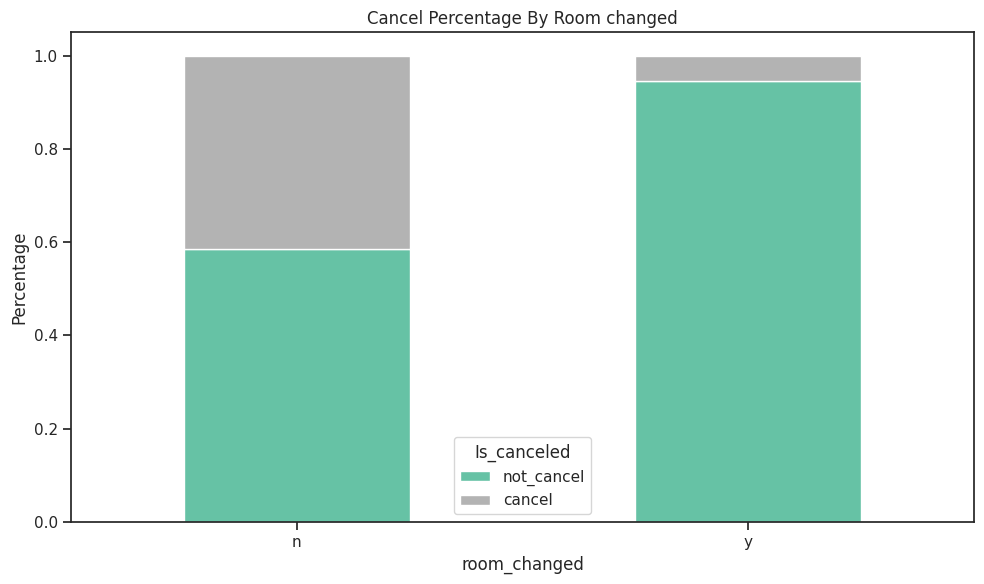

In [ ]:
ct = pd.crosstab(df_service['room_changed'], df_service['is_canceled'], normalize='index')

ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Cancel Percentage By Room changed')
plt.xlabel('room_changed')
plt.ylabel('Percentage')
plt.legend(['not_cancel', 'cancel'], title='Is_canceled')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

방이 바뀌었을 때 10%정도 예약취소를 진행했다.

바뀌지 않았을 경우에는 60% 정도 예약을 취소한 것을 확인했으며 이는 원인이 될 수 없다고 판단 할 수 있다.

## 국가별, 호텔 유형별, 예약일로부터 체크인 까지 남은 일수에 따라 예약취소가 영향이 있는가

### 국가별

In [ ]:
df['country'].value_counts(dropna=False)

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
MRT,1
KIR,1
SDN,1


In [ ]:
df['country'].isna().sum()

np.int64(488)

국가데이터가 없는 것은 내국인이 방문한 경우라 확인을 안한 경우 일 수 있다.

결측값은 'local'값으로 처리하겠다.

In [ ]:
df['country'].fillna('Local', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Local', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA'

In [ ]:
df['country'].value_counts(dropna=False)

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
MRT,1
KIR,1
SDN,1


결측값이 잘 채워졌다.

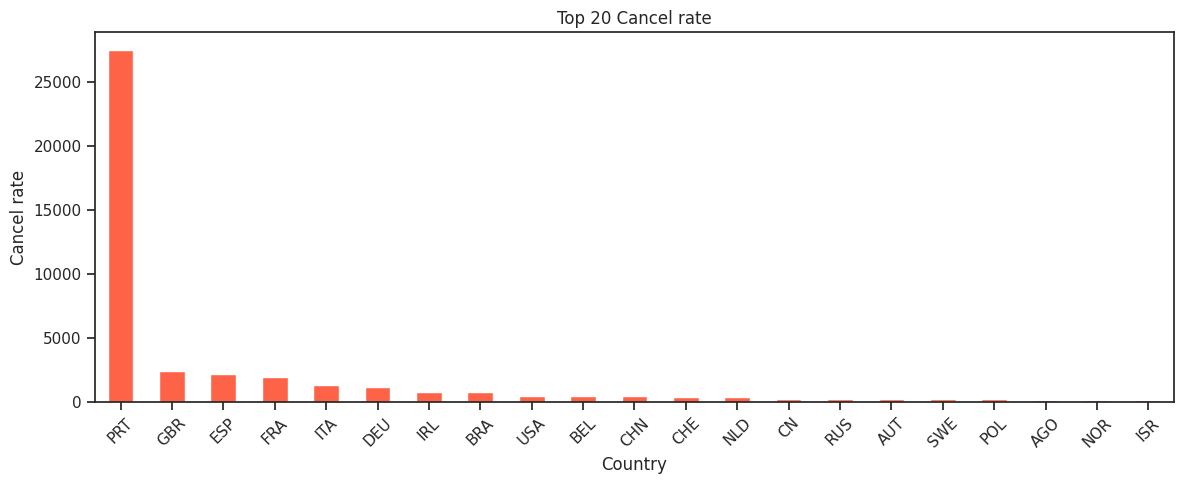

In [ ]:
top_cancel = df[df['is_canceled'] == 1]['country'].value_counts().nlargest(21)

top_cancel.plot(kind='bar', figsize=(12,5), color='tomato')
plt.title('Top 20 Cancel rate')
plt.ylabel('Cancel rate')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


취소비율이 높은 나라 상위 20개국이다.
페루(PRT)가 압도적으로 높았으며 14위 국가 아래로는 취소를 하는 경우는 크게 없다.

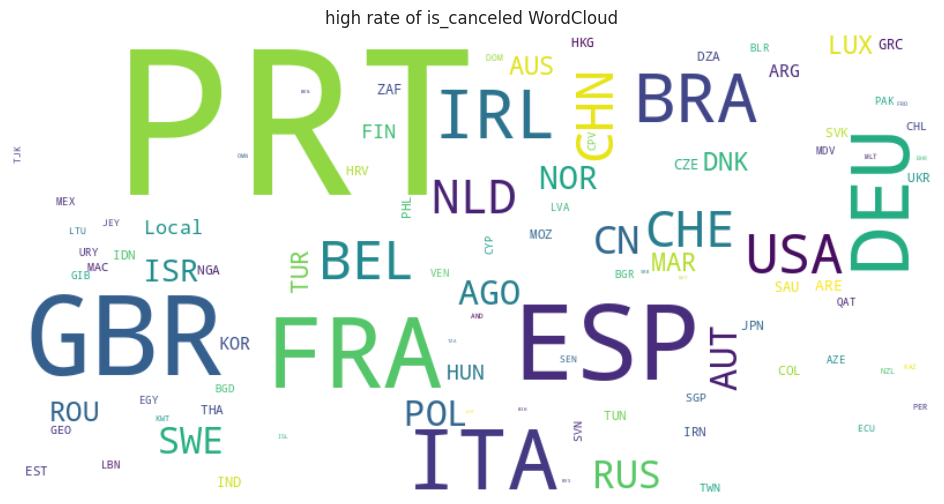

In [ ]:
from wordcloud import WordCloud

text_freq = df[df['is_canceled'] == 1]['country'].value_counts().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(text_freq)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('high rate of is_canceled WordCloud')
plt.show()


취소 비율이 높은 나라일수록 큰 글씨로 나타나진다.

### 호텔 유형별

In [ ]:
df['hotel'].value_counts()

,count
hotel,
City Hotel,79330
Resort Hotel,40060


두가지 케이스만 존재했고 취소비율을 파악해 보겠다.

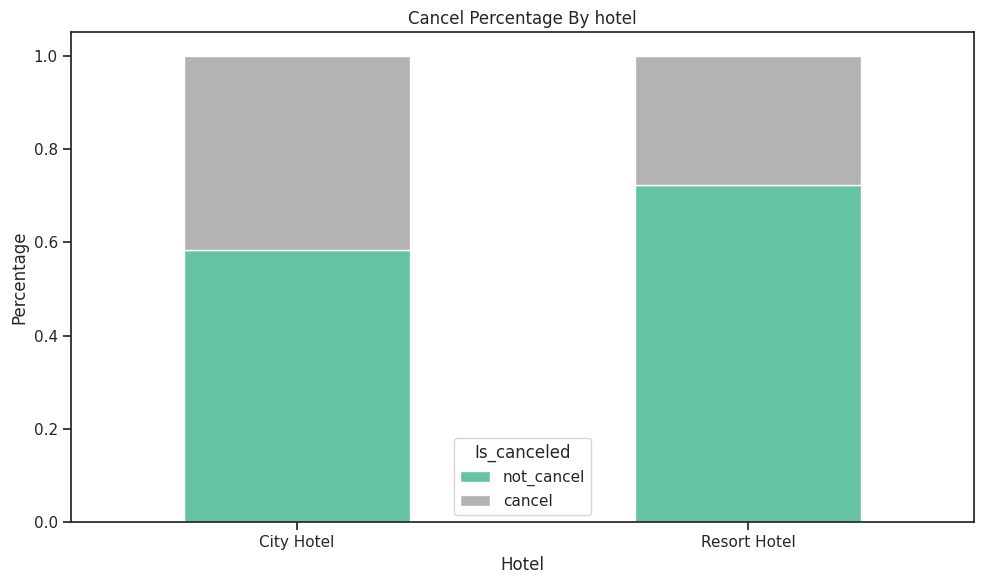

In [ ]:
ct = pd.crosstab(df['hotel'], df_service['is_canceled'], normalize='index')

ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Cancel Percentage By hotel')
plt.xlabel('Hotel')
plt.ylabel('Percentage')
plt.legend(['not_cancel', 'cancel'], title='Is_canceled')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

도심호텔, 리조트 호텔 두경우 모두 60%이상 취소를 하는 경우는 없다.

도심이 조금 더 비율이 높다. 일정변경등의 이유가 있을텐데 추후 데이터를 받아 분석해볼 필요는 있다.

### 예약일 까지 남은 일수와 예약 취소의 관계

In [ ]:
df['lead_time'].value_counts()

,count
lead_time,
0,6345
1,3460
2,2069
3,1816
4,1715
...,...
435,1
532,1
371,1


그룹 별 예약 남은 기간 평균

In [ ]:
df.groupby('is_canceled')['lead_time'].mean()

,lead_time
is_canceled,
0,79.984687
1,144.848815


평균적으로 145일(약 5개월) 이상 남은 사람들이 예약을 취소하였다

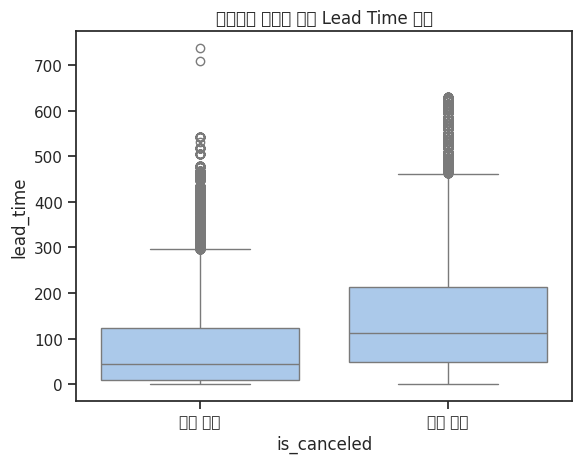

In [ ]:

sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.xticks([0,1], ['예약 유지', '예약 취소'])
plt.title('예약취소 여부에 따른 Lead Time 분포')
plt.show()

분포를 보았을때 예약취소한 경우가 예약일자가 더 많이 남았다.

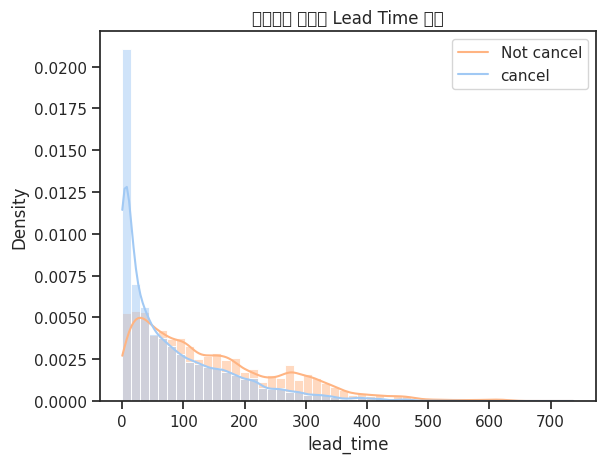

In [ ]:
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=50, kde=True, stat='density', common_norm=False)
plt.title('예약취소 여부별 Lead Time 분포')
plt.legend(labels=['Not cancel', 'cancel'])
plt.show()

방문이 임박할수록 예약취소를 잘 하지 않는다.

## 결론
 - 예약취소에 영항을 주는 경우는 예약일이 많이 남았을때, 국가에따라 영향을 준다.
 - 예약을 줄이고자 노력을 한다면 예약을 하는 경우 패널티를 주는 것도 방법이다. 대부분 5개월 정도에 취소를 하게되는데 예약 보증금을 받는식으로 규정을 두면 좋을 것 같다.
 - 특정국가에 경우 예약 취소가 빈번한 것으로 확인 되었는데 이는 추가적인 예약취소 사유를 봐야 할 것이다.
 - 특정 국가만 지정하여 패널티를 부과하는 것은 정치적인 문제가 있기에 제한됩니다. 차라리 해당국가의 예약 취소율이 낮은 숙박업체의 운영정책을 일부 반영하는 것도 좋은 해결 책일 것이다.
 - 추가로 호텔의 식당의 질 개선, 주차공간 추가 확보 및 주차환경 개선도 도움이 될 것이다.
 - 자주 오는 고객을 위한다면 할인제도, 10박 당 1박 무료같은 혜택을 주는 것도 줗을 것이고 특히 지역 인근 식당, 관광지와 협약해 방문시 할인 쿠폰 발행도 좋은 제도 일 것이다.